In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ML 2/Body Performance/bodyPerformance.csv'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(file_path)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


**No missing values**

In [ ]:
df.isna().sum()

,0
age,0
gender,0
height_cm,0
weight_kg,0
body fat_%,0
diastolic,0
systolic,0
gripForce,0
sit and bend forward_cm,0
sit-ups counts,0


**Data types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [ ]:
df['gender'] = df['gender'].astype('category')

In [ ]:
# Check unique values in gender column
unique_gender = df['gender'].unique()
print(unique_gender)

['M', 'F']
Categories (2, object): ['F', 'M']


In [ ]:
df['class'] = df['class'].astype('category')

In [ ]:
# Check unique values in class column
unique_classes = df['class'].unique()
print(unique_classes)

['C', 'A', 'B', 'D']
Categories (4, object): ['A', 'B', 'C', 'D']


**Duplicates**

In [ ]:
df.duplicated().sum()

1

In [ ]:
#remove duplicate
print(f'with duplicates:{df.shape}')
df.drop_duplicates(inplace=True)
print(f'without duplicates:{df.shape}')

with duplicates:(13393, 12)
without duplicates:(13392, 12)


**Response Variable**

In [ ]:
# Count the number of occurrences in each class
class_counts = df['class'].value_counts()

# Display the counts
print(class_counts)

class
C    3349
D    3349
A    3347
B    3347
Name: count, dtype: int64


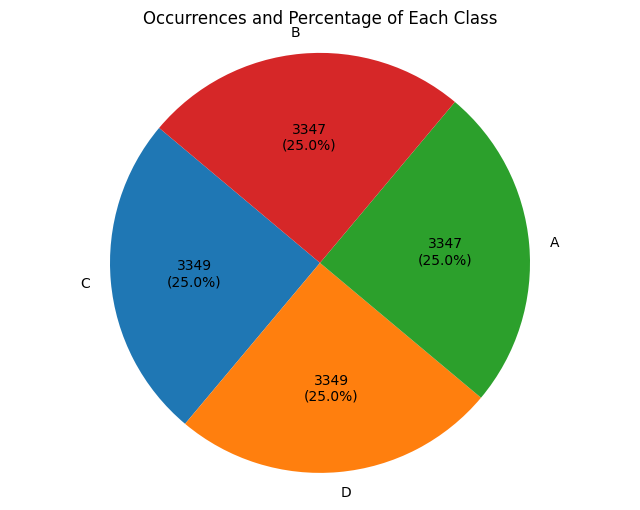

In [ ]:
import matplotlib.pyplot as plt

# Count the number of occurrences in each class
class_counts = df['class'].value_counts()

# Create a function to display both count and percentage
def func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    return f'{absolute}\n({pct:.1f}%)'

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct=lambda pct: func(pct, class_counts), startangle=140)
plt.title('Occurrences and Percentage of Each Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

**Gender**

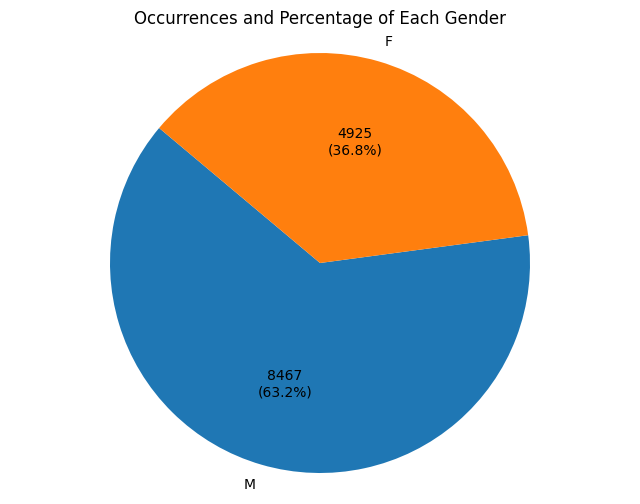

In [ ]:
# Count the number of occurrences for each gender
gender_counts = df['gender'].value_counts()

# Create a function to display both count and percentage
def func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    return f'{absolute}\n({pct:.1f}%)'

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct=lambda pct: func(pct, gender_counts), startangle=140)
plt.title('Occurrences and Percentage of Each Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

**Age**

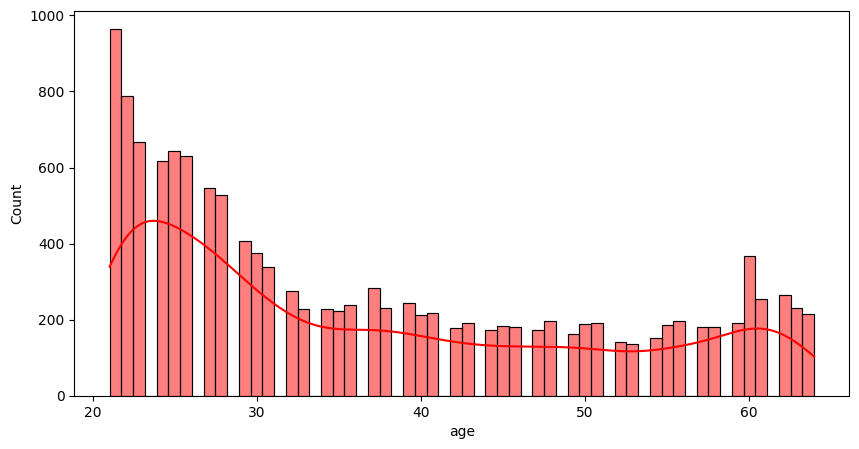

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="age", bins=60, kde=True, color='red')
plt.show()

In [ ]:
# Calculate min, max, and average
age_min = df['age'].min()
age_max = df['age'].max()
age_mean = df['age'].mean()

print(f"Minimum age: {age_min}")
print(f"Maximum age: {age_max}")
print(f"Average age: {age_mean:.2f}")  # rounded to 2 decimal places

Minimum age: 21.0
Maximum age: 64.0
Average age: 36.78


**Height**

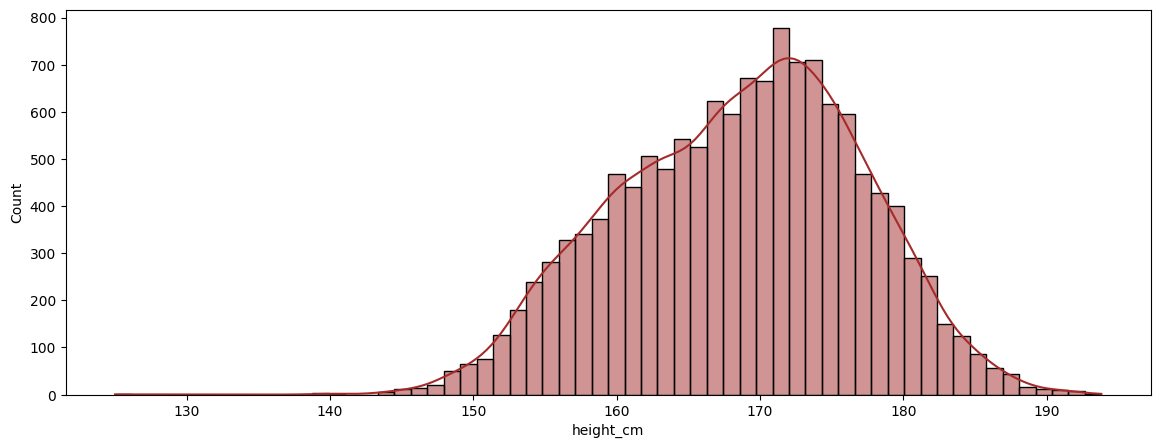

In [ ]:
plt.figure(figsize=(14, 5))
sns.histplot(data=df, x="height_cm", bins=60, kde=True, color='brown')
plt.show()

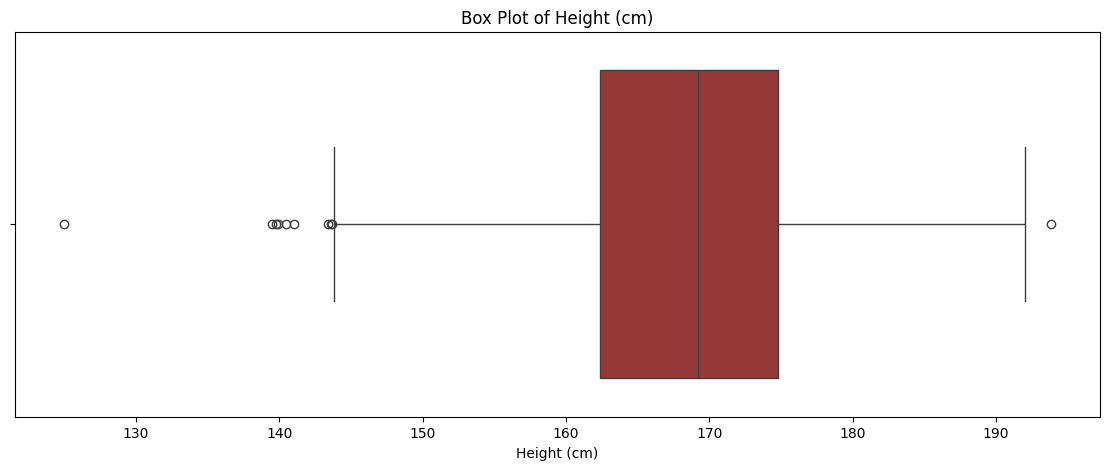

In [ ]:
# Set the figure size for height
plt.figure(figsize=(14, 5))

# Create a box plot for height
sns.boxplot(data=df, x="height_cm", color='brown')
plt.title('Box Plot of Height (cm)')
plt.xlabel('Height (cm)')

# Show the plot
plt.show()

**Weight**

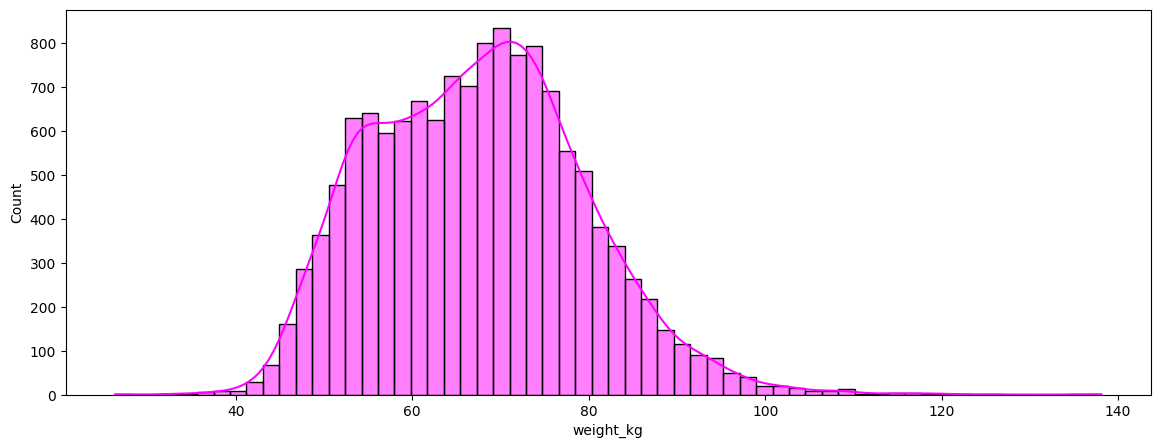

In [ ]:
plt.figure(figsize=(14, 5))
sns.histplot(data=df, x="weight_kg", bins=60, kde=True, color='magenta')
plt.show()

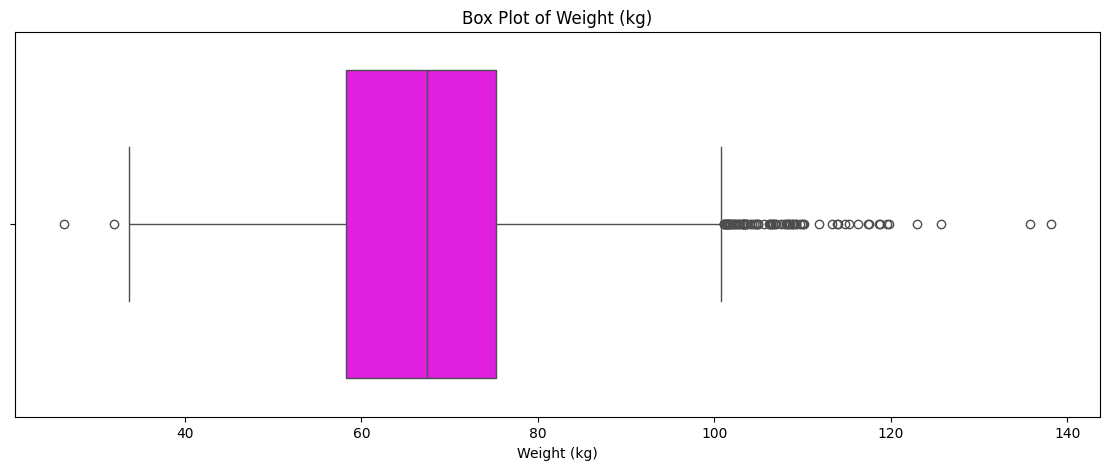

In [ ]:
# Set the figure size for weight
plt.figure(figsize=(14, 5))

# Create a box plot for weight
sns.boxplot(data=df, x="weight_kg", color='magenta')
plt.title('Box Plot of Weight (kg)')
plt.xlabel('Weight (kg)')

# Show the plot
plt.show()

**Body Fat %**

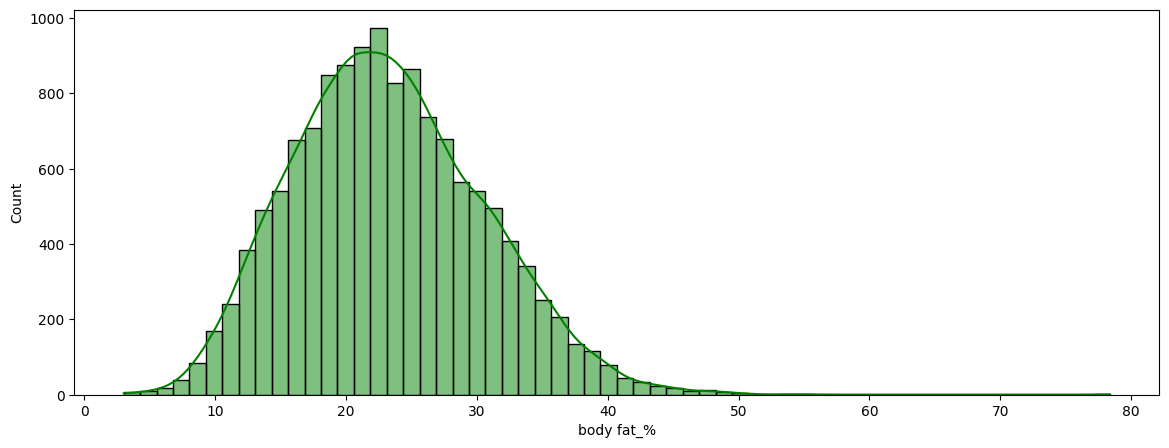

In [ ]:
plt.figure(figsize=(14, 5))
sns.histplot(data=df, x="body fat_%", bins=60, kde=True, color='green')
plt.show()

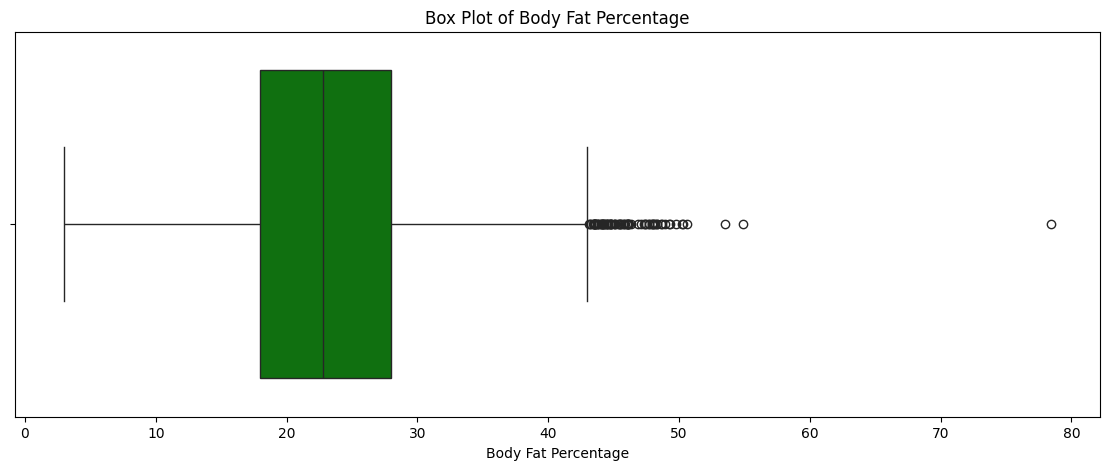

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Create a box plot
sns.boxplot(data=df, x="body fat_%", color='green')
plt.title('Box Plot of Body Fat Percentage')
plt.xlabel('Body Fat Percentage')

# Show the plot
plt.show()

In [ ]:
# Display records where 'body fat_%' is greater than 75
print(df[df['body fat_%'] > 75])

      age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
735  21.0      M      177.6       74.5        78.4       69.0     122.0   

     gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
735       44.9                     26.1            59.0          235.0     A  


The body fat percentage of 78.4% seems unrealistic for a 21-year-old male with the provided height and weight whose fitness level is good. Hence we will remove that

In [ ]:
# Remove records where 'body fat_%' is greater than 75
df1 = df[df['body fat_%'] < 75]

# Display the updated DataFrame
print(df1)

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm cl

In [ ]:
# Check the size of df1
df1.shape

(13391, 12)

**Sit and bend forward_cm**

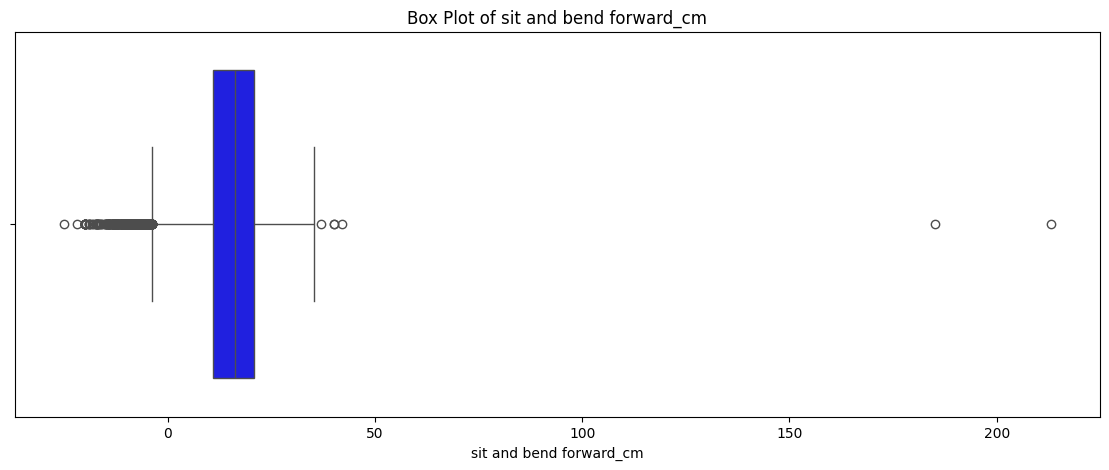

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Create a box plot
sns.boxplot(data=df1, x="sit and bend forward_cm", color='blue')
plt.title('Box Plot of sit and bend forward_cm')
plt.xlabel('sit and bend forward_cm')

# Show the plot
plt.show()

In [ ]:
# Filter the DataFrame for sit and bend forward values greater than height
outliers_df = df1[df1['sit and bend forward_cm'] > df1['height_cm']]

# Print the outliers for inspection
print(outliers_df)

       age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
2657  33.0      M      165.6       60.4        17.8       81.0     127.0   
3355  45.0      M      164.4       64.4        24.3       96.0     142.0   

      gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
2657       38.6                    213.0            53.0          244.0     B  
3355       38.5                    185.0            44.0          223.0     A  


Two outliers can be seen from above which has unrealistic values

In [ ]:
# Display records where 'sit and bend forward_cm' is greater than or equal to 50
print(df1[df1['sit and bend forward_cm'] > 50])

       age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
2657  33.0      M      165.6       60.4        17.8       81.0     127.0   
3355  45.0      M      164.4       64.4        24.3       96.0     142.0   

      gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
2657       38.6                    213.0            53.0          244.0     B  
3355       38.5                    185.0            44.0          223.0     A  


Remove those 2 records

In [ ]:
# Remove records where 'sit and bend forward_cm' is greater than or equal to 50
df2 = df1[df1['sit and bend forward_cm'] < 50]

# Display the updated DataFrame
print(df2)

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm cl

In [ ]:
# Find records with negative values in the 'sit and bend forward_cm' column
negative_records = df2[df2['sit and bend forward_cm'] < 0]

# Display the negative records
print(negative_records)

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
33     30.0      M      172.1      79.50    26.70000       91.0     148.0   
47     26.0      M      172.1      66.10    24.90000       62.0     102.0   
75     22.0      M      171.9      78.46    22.90000       64.0     116.0   
139    22.0      M      180.3      91.70    32.10000       75.0     134.0   
248    61.0      M      171.6      86.40    28.70000       70.0     142.0   
...     ...    ...        ...        ...         ...        ...       ...   
13280  26.0      M      173.5      68.70    15.16476       78.0     120.0   
13301  26.0      M      175.4      74.70    18.20000       93.0     150.0   
13318  25.0      M      187.9      94.90    19.40000       68.0     107.0   
13357  56.0      M      173.0      52.60    12.90000       92.0     141.0   
13380  42.0      M      172.0      76.30    32.80000      100.0     147.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm cl

The most logical measure is to use the level of the feet as recording zero, so that any measure that does not reach the toes is negative and any reach past the toes is positive
https://www.topendsports.com/testing/tests/sit-and-reach.htm

Hence we don't remove he negative values because they make sense

In [ ]:
# Check the size of df1
df2.shape

(13389, 12)

**Broad jump_cm**

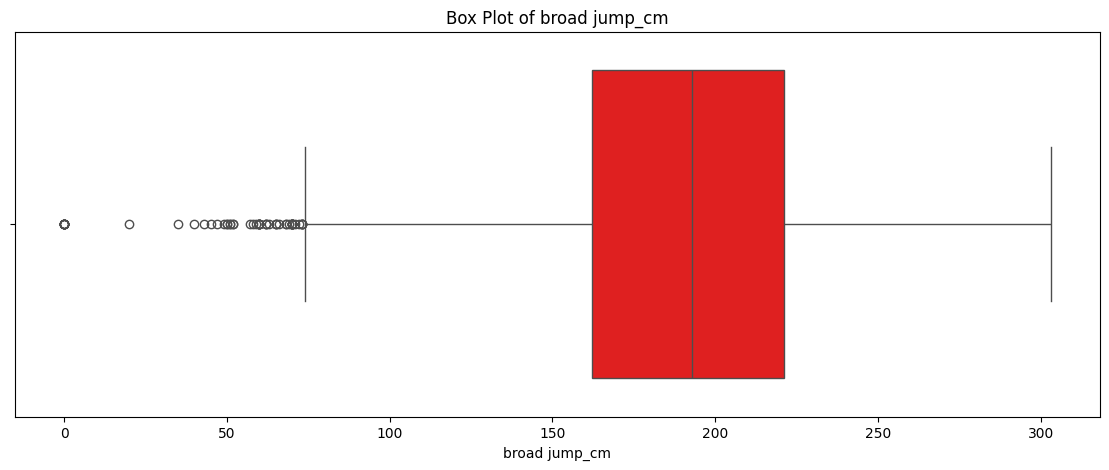

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Create a box plot
sns.boxplot(data=df2, x="broad jump_cm", color='red')
plt.title('Box Plot of broad jump_cm')
plt.xlabel('broad jump_cm')

# Show the plot
plt.show()

In [ ]:
# Display records where 'broad jump_cm' is equal to 0
print(df2[df2['broad jump_cm'] == 0])

       age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
484   22.0      F      167.4       66.2        34.0       62.0     110.0   
712   58.0      M      168.7       76.1        27.5       84.0     139.0   
1919  59.0      F      162.9       61.0        32.6       82.0     123.0   
4756  28.0      M      176.6       82.2        20.7       83.0     126.0   
4900  60.0      F      162.2       67.3        41.8       47.0     131.0   
7366  50.0      M      178.2       88.4        23.4       85.0     146.0   
7721  56.0      F      156.0       51.1        28.4       73.0     113.0   
7944  45.0      F      153.4       33.7        16.1       81.0     124.0   
7954  61.0      F      153.0       64.6        31.4       77.0     152.0   
8599  60.0      F      160.0       76.9        50.3       82.0     141.0   

      gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
484        28.5                     11.2            38.0            0.0     C  
712

average	for males: 221-230cm
average for females: 171-180cm

while athletes can jump over 300cm as well.

College-aged males: The average Broad Jump distance for college-aged males is approximately 8-9 feet (2.4-2.7 meters).
College-aged females: The average Broad Jump distance for college-aged females is approximately 6-7 feet (1.8-2.1 meters).
High school athletes: The average Broad Jump distance for high school athletes is approximately 9-10 feet (2.7-3 meters) for males and 7-8 feet (2.1-2.4 meters) for females.
Professional basketball players: Professional basketball players have an average Broad Jump distance of 10-11 feet (3-3.4 meters).

Reference: https://www.matassessment.com/blog/broad-jump-test#:~:text=College%2Daged%20males%3A%20The%20average,(1.8%2D2.1%20meters).

But our dataset may contain people with disabilities.
It is possible for individuals with a broad jump of 0 or very less to still have reasonable scores in other tests (e.g., sit-ups and sit-and-bend-forward) as these tests may evaluate different aspects of fitness (e.g., flexibility).

HENCE WE WON'T REMOVE


**Systolic Rate**

In [ ]:
# Filter records where systolic is less than diastolic
invalid_records = df2[df2['systolic'] < df2['diastolic']]

# Display the invalid records
print(invalid_records)

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
7495   30.0      F      156.2      52.80        28.2      156.2     104.0   
7597   30.0      M      166.6      66.08        14.4       67.0      14.0   
8217   31.0      M      176.7      80.32        20.8       46.2      43.9   
12949  24.0      M      171.0      78.70        20.0       99.0      95.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
7495        21.7                     27.2            43.0          162.0     C  
7597        53.8                     17.2            57.0          221.0     A  
8217        43.9                     17.2            57.0          221.0     B  
12949       46.5                     12.8            50.0          197.0     D  


The systolic rate is always expected to be higher than the diastolic rate. Hence we will remove them.

In [ ]:
# Remove records where systolic is less than diastolic
df3 = df2[df2['systolic'] >= df2['diastolic']]

# Display the cleaned DataFrame
print(df3)

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm cl

In [ ]:
df3.shape

(13385, 12)

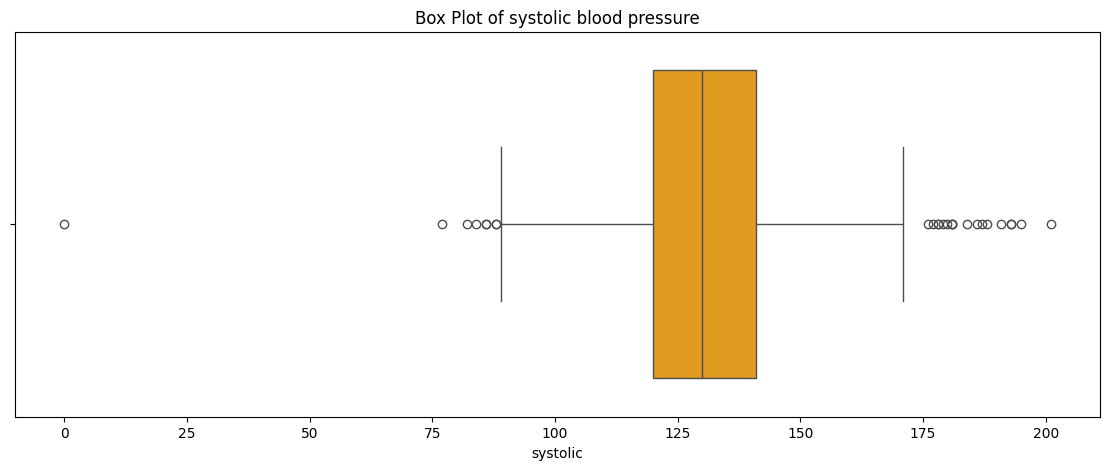

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Create a box plot
sns.boxplot(data=df3, x="systolic", color='orange')
plt.title('Box Plot of systolic blood pressure')
plt.xlabel('systolic')

# Show the plot
plt.show()

0mmHg seems not possible

Furthermore, on the oppoosite side, systolic blood pressure of 200 mmHg is considered dangerously high and falls into the category of a hypertensive crisis. However that is a possible value.

In [ ]:
# Records where systolic is less than 20
print(df3[df3['systolic'] == 0])

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
10624  26.0      F      160.0      63.56        32.0        0.0       0.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
10624       23.7                     17.1            23.0          128.0     D  


In [ ]:
# Remove Records where systolic and diastolic is 0
df4 = df3[df3['systolic'] > 0]

In [ ]:
df4.shape

(13384, 12)

Diastolic pressure = 0 mmHg and systolic pressure = 0 mmHg: These are impossible values in a living individual, strongly indicating a data entry error. Hence removed

**Diastolic blood pressure**

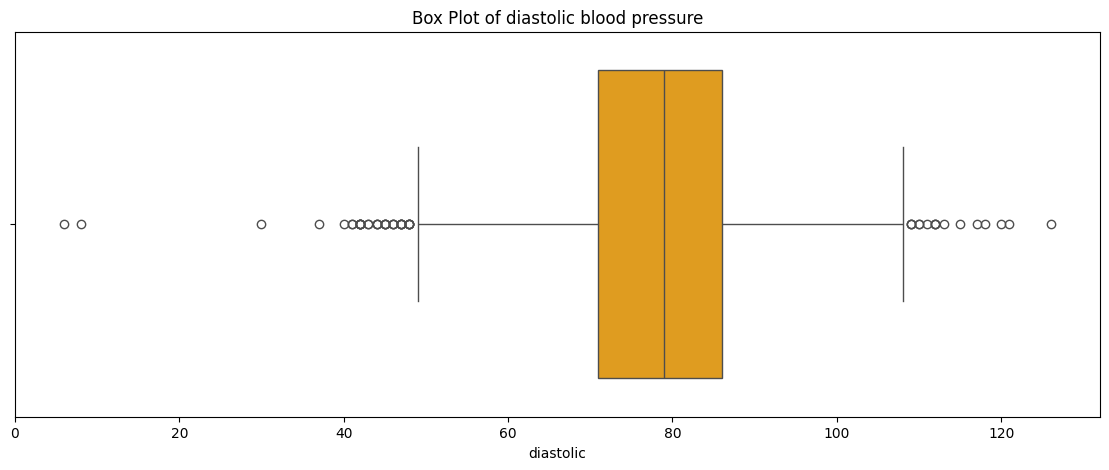

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Create a box plot
sns.boxplot(data=df4, x="diastolic", color='orange')
plt.title('Box Plot of diastolic blood pressure')
plt.xlabel('diastolic')

# Show the plot
plt.show()

In [ ]:
# Records where diastolic is less than 20
print(df4[df4['diastolic'] < 20])

       age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
336   35.0      M      173.1      77.60        22.8        8.0     122.0   
3524  44.0      M      177.0      78.28        22.1        6.0     145.0   

      gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
336        46.4                     16.7            47.0          216.0     B  
3524       47.4                     10.5            42.0          215.0     B  


Diastolic pressure = 8 mmHg, 6mm. This is highly abnormal. Diastolic pressure below 40 mmHg is critical, and 8 and 6 is extremely low, suggesting a likely data error.

In [ ]:
# Remove records where systolic is less than diastolic
df5 = df4[df4['diastolic'] >= 20]

# Display the cleaned DataFrame
print(df5)

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0      M      172.3      75.24        21.3       80.0     130.0   
1      25.0      M      165.0      55.80        15.7       77.0     126.0   
2      31.0      M      179.6      78.00        20.1       92.0     152.0   
3      32.0      M      174.5      71.10        18.4       76.0     147.0   
4      28.0      M      173.8      67.70        17.1       70.0     127.0   
...     ...    ...        ...        ...         ...        ...       ...   
13388  25.0      M      172.1      71.80        16.2       74.0     141.0   
13389  21.0      M      179.7      63.90        12.1       74.0     128.0   
13390  39.0      M      177.2      80.50        20.1       78.0     132.0   
13391  64.0      F      146.1      57.70        40.4       68.0     121.0   
13392  34.0      M      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm cl

In [ ]:
df5.shape

(13382, 12)

**Correlation Heatmap**

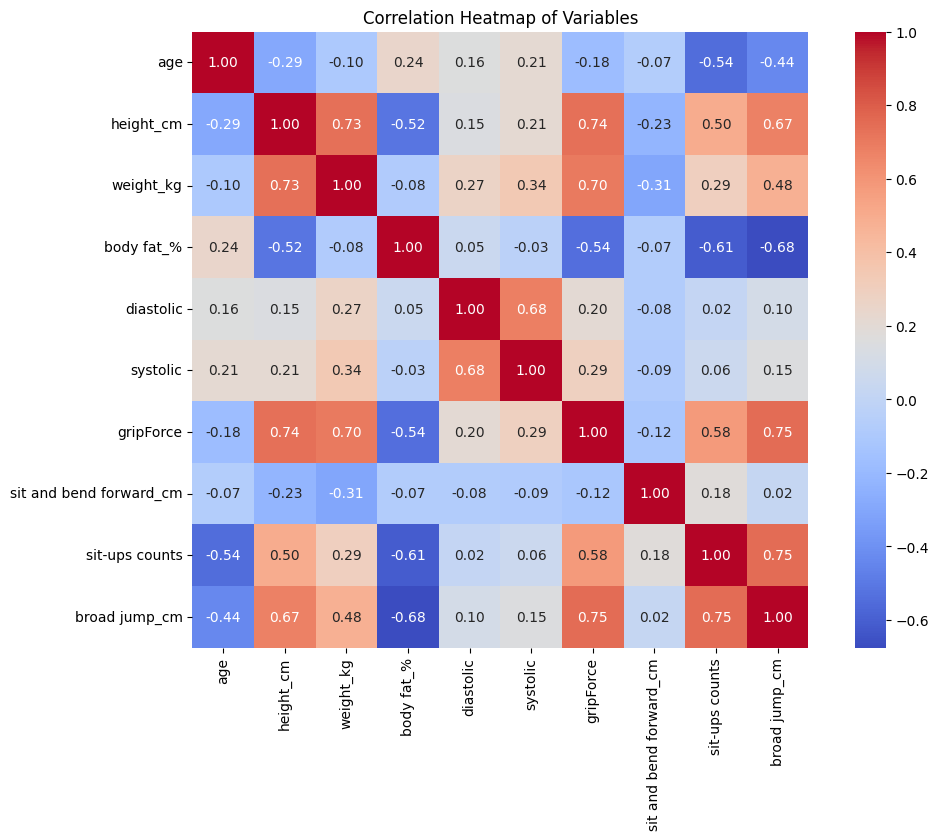

In [ ]:
# Drop the 'gender' and 'class' columns
correlation_data = df5.drop(columns=['gender', 'class'])

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title("Correlation Heatmap of Variables")
plt.show()

# **Feature Engineering**

**Creation of BMI variable**

In [ ]:
# Convert height from cm to meters
df5['height_m'] = df5['height_cm'] / 100

# Calculate BMI and create a new column
df5['bmi'] = df5['weight_kg'] / (df5['height_m'] ** 2)

# Optionally drop the 'height_m' column if you don't need it anymore
df5 = df5.drop(columns=['height_m'])

# Display the updated dataframe
df5.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,bmi
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,25.344179
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,20.495868
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,24.181428
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,23.349562
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,22.412439


**Creation of MAP(Mean Arterial Pressure)**

The Mean Arterial Pressure (MAP) is a derived variable that provides a more comprehensive view of blood pressure over the cardiac cycle. It reflects the average pressure in a person's arteries during one heartbeat, incorporating both SBP and DBP into a single metric.

In [ ]:
# Create a new variable 'map' (Mean Arterial Pressure)
df5['map'] = (df5['systolic'] + 2 * df5['diastolic']) / 3

# Display the updated dataframe
df5.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,bmi,map
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,25.344179,96.666667
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,20.495868,93.333333
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,24.181428,112.000000
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,23.349562,99.666667
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,22.412439,89.000000


# **Splitting to train and test**

In [ ]:
# Select the columns for X and y
X = df5[['age', 'gender', 'body fat_%', 'gripForce', 'sit and bend forward_cm',
         'sit-ups counts', 'broad jump_cm', 'bmi', 'map']]
y = df5['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Analysis**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert ordinal features to numeric
X_train_numeric = X_train.drop(columns=['gender'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X_train_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])]

print(vif_data)

                   feature         VIF
0                      age   12.765929
1               body fat_%   34.008023
2                gripForce   45.941352
3  sit and bend forward_cm    5.076935
4           sit-ups counts   26.464413
5            broad jump_cm   77.381450
6                      bmi  151.578177
7                      map   78.706394


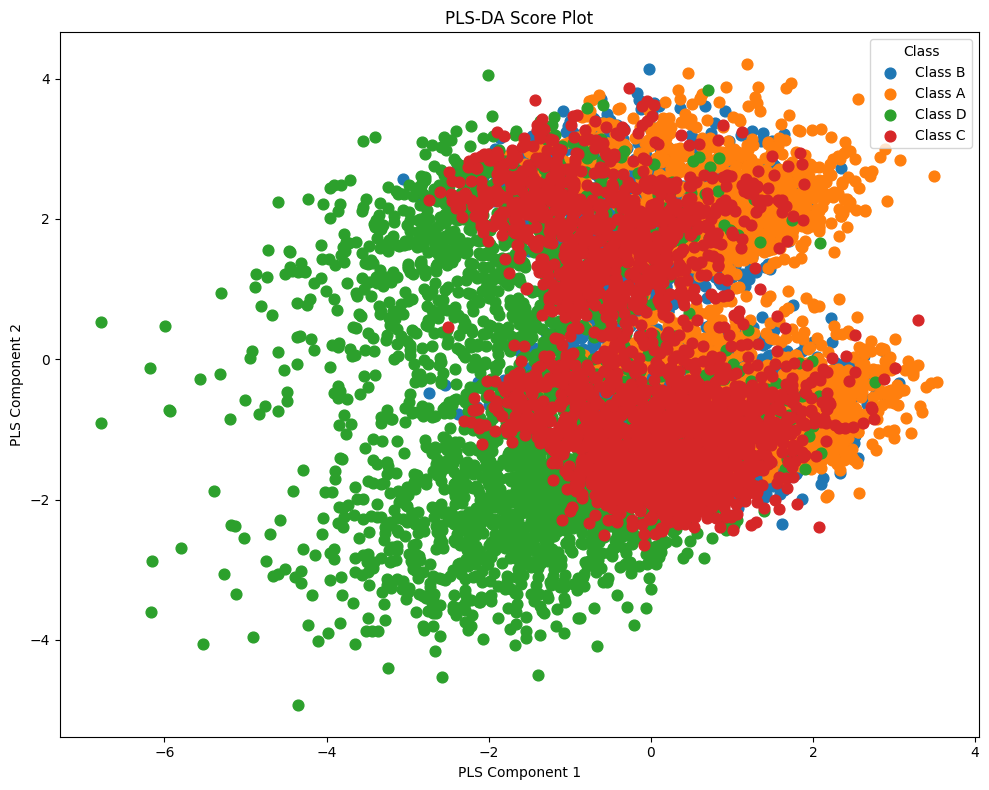

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'gender' is a categorical variable in X_train
# Create a column transformer for preprocessing
column_transformer = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X_train.select_dtypes(include=['float64', 'int']).columns),  # Numeric columns
        ('cat', OneHotEncoder(), ['gender'])  # One-hot encode the 'gender' column
    ],
    remainder='drop'  # Drop other columns
)

# Transform the features
X_train_transformed = column_transformer.fit_transform(X_train)

# Encode the target variable if it's categorical
y_train_encoded = LabelEncoder().fit_transform(y_train)

# Fit the PLS-DA model with 2 components
pls_da = PLSRegression(n_components=2)
X_scores = pls_da.fit_transform(X_train_transformed, y_train_encoded)[0]

# Create a mapping from encoded values to class names
class_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
class_labels = [class_mapping[label] for label in y_train_encoded]

# Plot the score plot
plt.figure(figsize=(10, 8))
for class_value in set(class_labels):
    class_indices = [i for i, label in enumerate(class_labels) if label == class_value]
    plt.scatter(X_scores[class_indices, 0], X_scores[class_indices, 1], label=f'Class {class_value}', s=60)

plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.title('PLS-DA Score Plot')
plt.legend(title='Class')
plt.tight_layout()
plt.show()


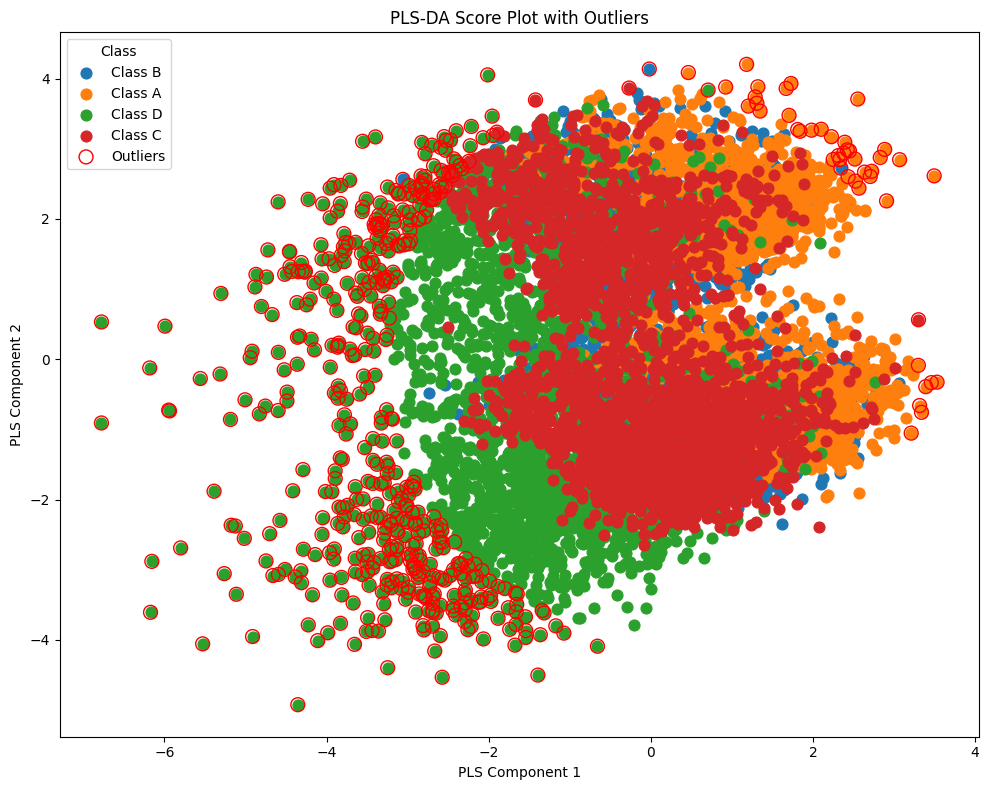

In [ ]:
import numpy as np
from scipy.stats import chi2

# Calculate the Mahalanobis distance
mean_scores = np.mean(X_scores, axis=0)
cov_matrix = np.cov(X_scores, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

mahalanobis_distances = []
for score in X_scores:
    distance = np.sqrt((score - mean_scores).T @ inv_cov_matrix @ (score - mean_scores))
    mahalanobis_distances.append(distance)

# Convert to numpy array for easier handling
mahalanobis_distances = np.array(mahalanobis_distances)

# Set a threshold for outliers (e.g., 95th percentile)
threshold = np.percentile(mahalanobis_distances, 95)

# Identify outliers
outliers = np.where(mahalanobis_distances > threshold)[0]

# Plot the score plot with outliers marked
plt.figure(figsize=(10, 8))
for class_value in set(class_labels):
    class_indices = [i for i, label in enumerate(class_labels) if label == class_value]
    plt.scatter(X_scores[class_indices, 0], X_scores[class_indices, 1], label=f'Class {class_value}', s=60)

# Mark outliers with a different color
plt.scatter(X_scores[outliers, 0], X_scores[outliers, 1], edgecolor='red', facecolor='none', s=100, label='Outliers')

plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.title('PLS-DA Score Plot with Outliers')
plt.legend(title='Class')
plt.tight_layout()
plt.show()


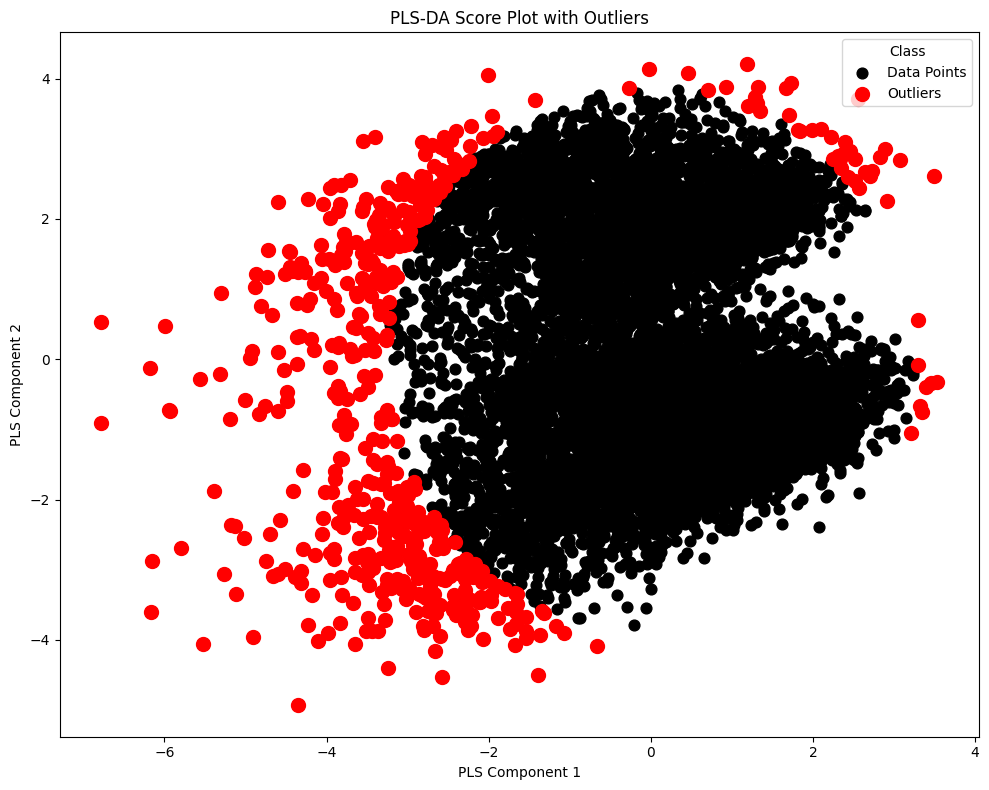

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Calculate the Mahalanobis distance
mean_scores = np.mean(X_scores, axis=0)
cov_matrix = np.cov(X_scores, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

mahalanobis_distances = []
for score in X_scores:
    distance = np.sqrt((score - mean_scores).T @ inv_cov_matrix @ (score - mean_scores))
    mahalanobis_distances.append(distance)

# Convert to numpy array for easier handling
mahalanobis_distances = np.array(mahalanobis_distances)

# Set a threshold for outliers (e.g., 95th percentile)
threshold = np.percentile(mahalanobis_distances, 95)

# Identify outliers
outliers = np.where(mahalanobis_distances > threshold)[0]

# Plot the score plot with outliers marked
plt.figure(figsize=(10, 8))

# Plot all points in black
plt.scatter(X_scores[:, 0], X_scores[:, 1], color='black', s=60, label='Data Points')

# Mark outliers with red dots
plt.scatter(X_scores[outliers, 0], X_scores[outliers, 1], edgecolor='red', facecolor='red', s=100, label='Outliers')

plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.title('PLS-DA Score Plot with Outliers')
plt.legend(title='Class', loc='upper right')
plt.tight_layout()
plt.show()

Number of outliers detected: 62


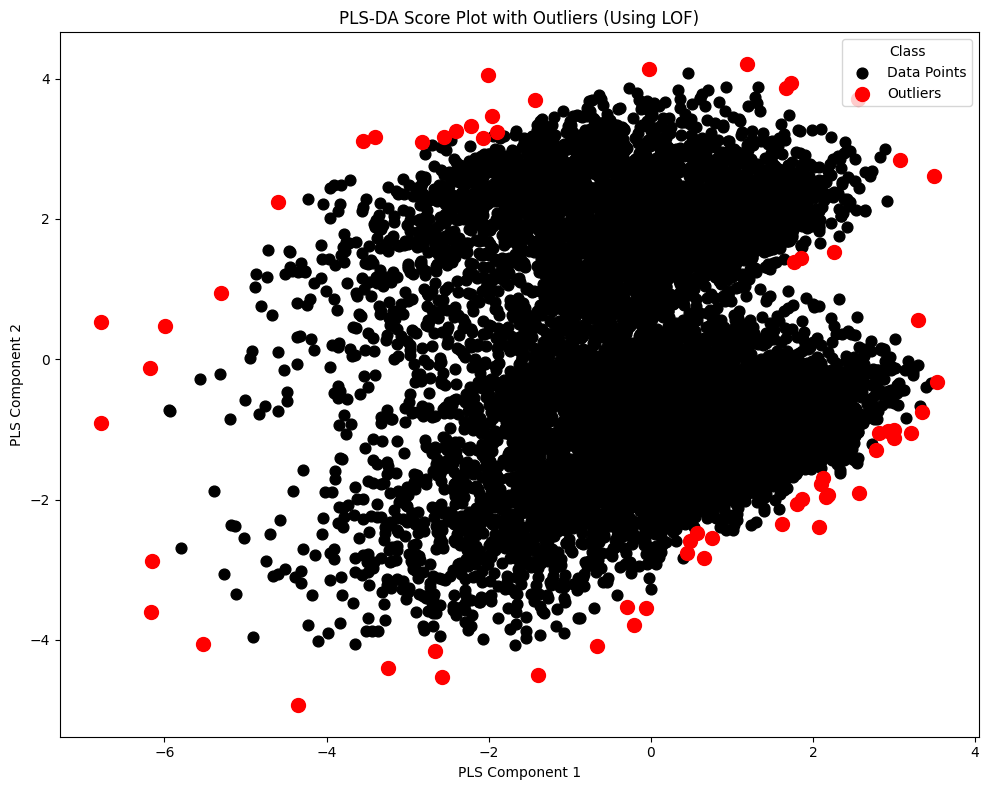

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Create a Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20)  # You can adjust the number of neighbors

# Fit the model and get the prediction labels (-1 for outliers, 1 for inliers)
y_pred = lof.fit_predict(X_scores)

# Identify outliers
outliers = np.where(y_pred == -1)[0]

# Print the number of outliers
print(f"Number of outliers detected: {len(outliers)}")

# Plot the score plot with outliers marked
plt.figure(figsize=(10, 8))

# Plot all points in black
plt.scatter(X_scores[:, 0], X_scores[:, 1], color='black', s=60, label='Data Points')

# Mark outliers with red dots
plt.scatter(X_scores[outliers, 0], X_scores[outliers, 1], edgecolor='red', facecolor='red', s=100, label='Outliers')

plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.title('PLS-DA Score Plot with Outliers (Using LOF)')
plt.legend(title='Class', loc='upper right')
plt.tight_layout()
plt.show()



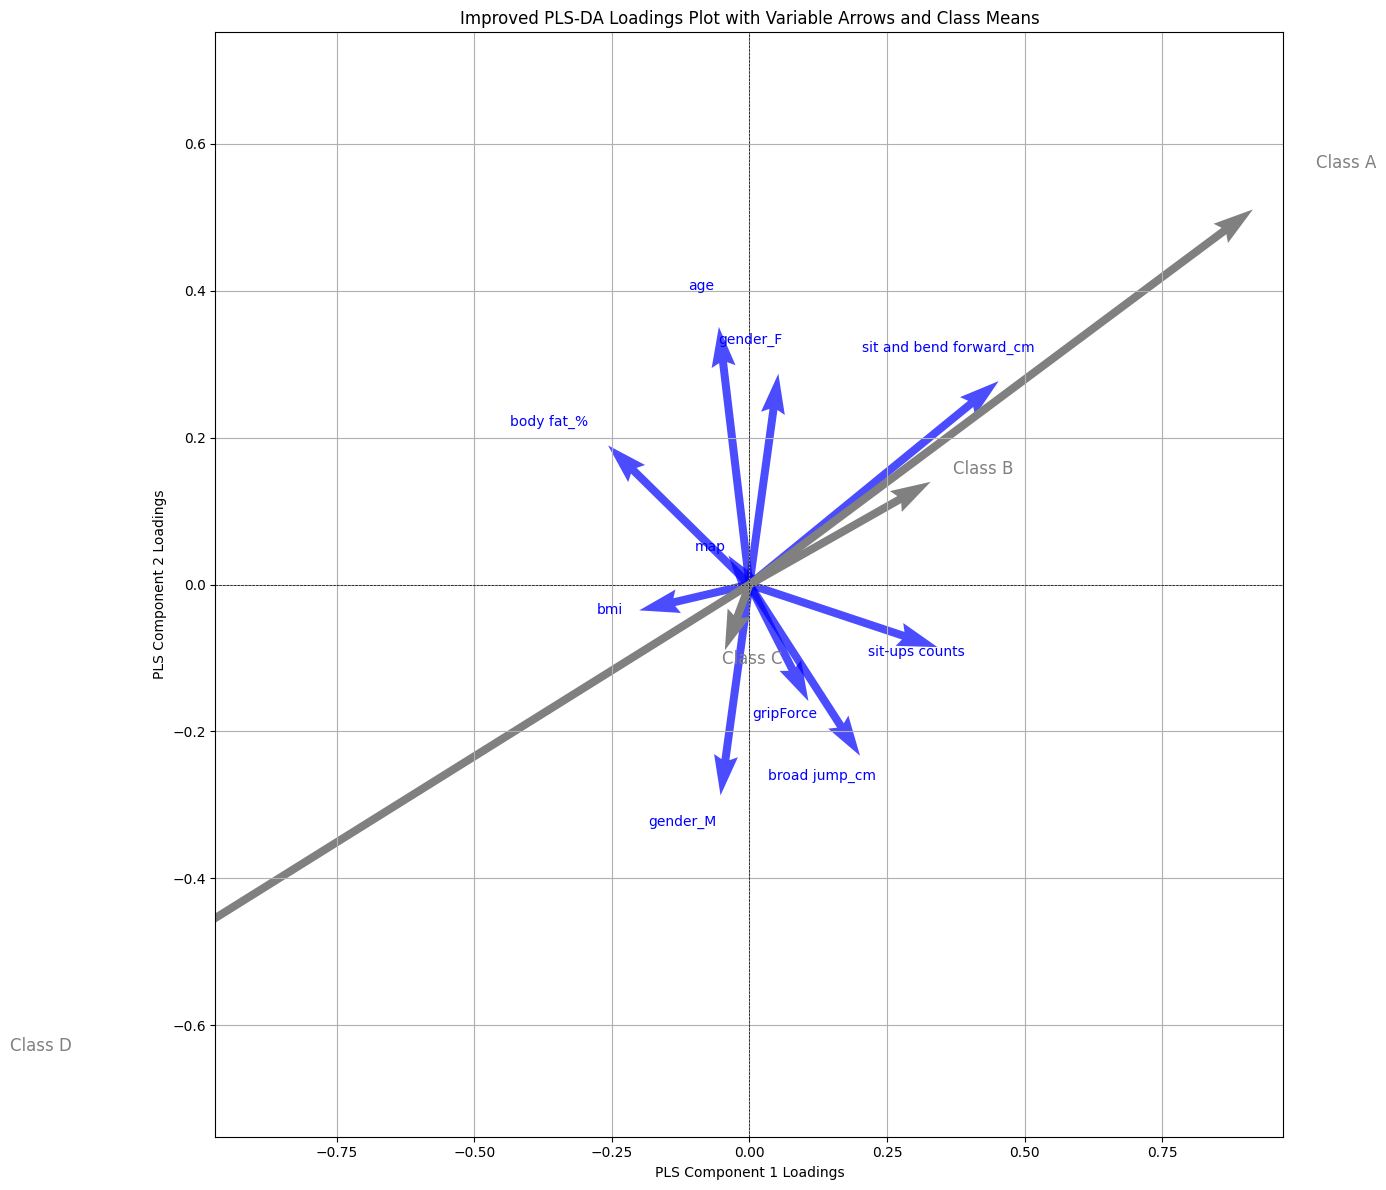

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'variable_names' contains your actual variable names in the correct order
variable_names = X_train.select_dtypes(include=['float64', 'int']).columns.tolist()
variable_names += ['gender_F', 'gender_M']  # Assuming gender is one-hot encoded

# Prepare data (assuming df5 is already defined and includes X_train and y_train)
column_transformer = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X_train.select_dtypes(include=['float64', 'int']).columns),
        ('cat', OneHotEncoder(), ['gender'])
    ],
    remainder='drop'
)

X_train_transformed = column_transformer.fit_transform(X_train)
y_train_encoded = LabelEncoder().fit_transform(y_train)

# Fit the PLS-DA model with 2 components
pls_da = PLSRegression(n_components=2)
X_scores = pls_da.fit_transform(X_train_transformed, y_train_encoded)[0]
loadings = pls_da.x_weights_

# Mapping from encoded values to class names
class_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
class_labels = [class_mapping[label] for label in y_train_encoded]

# Adjust plot limits based on loadings
x_lim = 1.5 * np.max(np.abs(loadings[:, 0]))  # Further expand limits
y_lim = 1.5 * np.max(np.abs(loadings[:, 1]))

plt.figure(figsize=(14, 12))

# Draw arrows for variables with adjustments
for i in range(loadings.shape[0]):
    plt.quiver(0, 0, loadings[i, 0] * 0.7, loadings[i, 1] * 0.7, angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.7)
    plt.text(loadings[i, 0] * 0.8, loadings[i, 1] * 0.8, variable_names[i], fontsize=10, ha='right', color='blue')

# Plot mean loadings for each class with labels at arrow ends
for class_value in set(class_labels):
    class_indices = [i for i, label in enumerate(class_labels) if label == class_value]
    mean_loadings = np.mean(X_scores[class_indices, :], axis=0)
    plt.quiver(0, 0, mean_loadings[0] * 0.8, mean_loadings[1] * 0.8, angles='xy', scale_units='xy', scale=1, linewidth=2, color='grey')
    plt.text(mean_loadings[0] * 0.9, mean_loadings[1] * 0.9, f'Class {class_value}', fontsize=12, ha='left', va='center', color='grey')

# Set axis limits to capture everything
plt.xlim(-x_lim, x_lim)
plt.ylim(-y_lim, y_lim)

# Labels and title
plt.xlabel('PLS Component 1 Loadings')
plt.ylabel('PLS Component 2 Loadings')
plt.title('Improved PLS-DA Loadings Plot with Variable Arrows and Class Means')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.tight_layout()
plt.show()


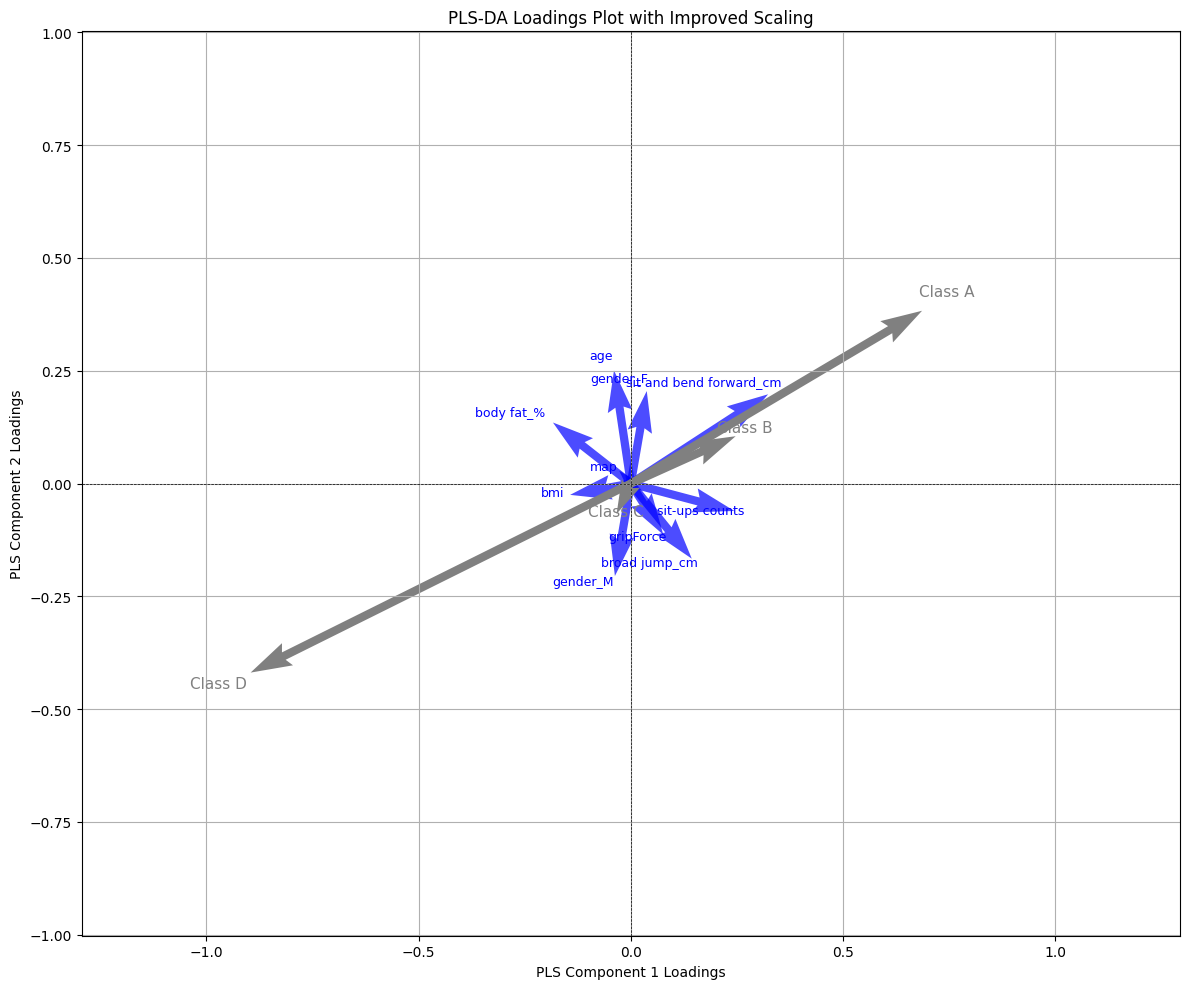

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'variable_names' contains your actual variable names in the correct order
variable_names = X_train.select_dtypes(include=['float64', 'int']).columns.tolist()
variable_names += ['gender_F', 'gender_M']  # Assuming gender is one-hot encoded

# Prepare data (assuming df5 is already defined and includes X_train and y_train)
column_transformer = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X_train.select_dtypes(include=['float64', 'int']).columns),
        ('cat', OneHotEncoder(), ['gender'])
    ],
    remainder='drop'
)

X_train_transformed = column_transformer.fit_transform(X_train)
y_train_encoded = LabelEncoder().fit_transform(y_train)

# Fit the PLS-DA model with 2 components
pls_da = PLSRegression(n_components=2)
X_scores = pls_da.fit_transform(X_train_transformed, y_train_encoded)[0]
loadings = pls_da.x_weights_

# Mapping from encoded values to class names
class_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
class_labels = [class_mapping[label] for label in y_train_encoded]

# Further reduce scaling factor and increase plot limits
x_lim = 2 * np.max(np.abs(loadings[:, 0]))
y_lim = 2 * np.max(np.abs(loadings[:, 1]))

plt.figure(figsize=(12, 10))

# Draw arrows for variables with smaller scaling
for i in range(loadings.shape[0]):
    plt.quiver(0, 0, loadings[i, 0] * 0.5, loadings[i, 1] * 0.5, angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.7)
    plt.text(loadings[i, 0] * 0.55, loadings[i, 1] * 0.55, variable_names[i], fontsize=9, ha='right', color='blue')

# Plot mean loadings for each class with labels at arrow ends
for class_value in set(class_labels):
    class_indices = [i for i, label in enumerate(class_labels) if label == class_value]
    mean_loadings = np.mean(X_scores[class_indices, :], axis=0)
    plt.quiver(0, 0, mean_loadings[0] * 0.6, mean_loadings[1] * 0.6, angles='xy', scale_units='xy', scale=1, linewidth=2, color='grey')
    plt.text(mean_loadings[0] * 0.65, mean_loadings[1] * 0.65, f'Class {class_value}', fontsize=11, ha='center', color='grey')

# Set axis limits to capture everything
plt.xlim(-x_lim, x_lim)
plt.ylim(-y_lim, y_lim)

# Labels and title
plt.xlabel('PLS Component 1 Loadings')
plt.ylabel('PLS Component 2 Loadings')
plt.title('PLS-DA Loadings Plot with Improved Scaling')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.tight_layout()
plt.show()


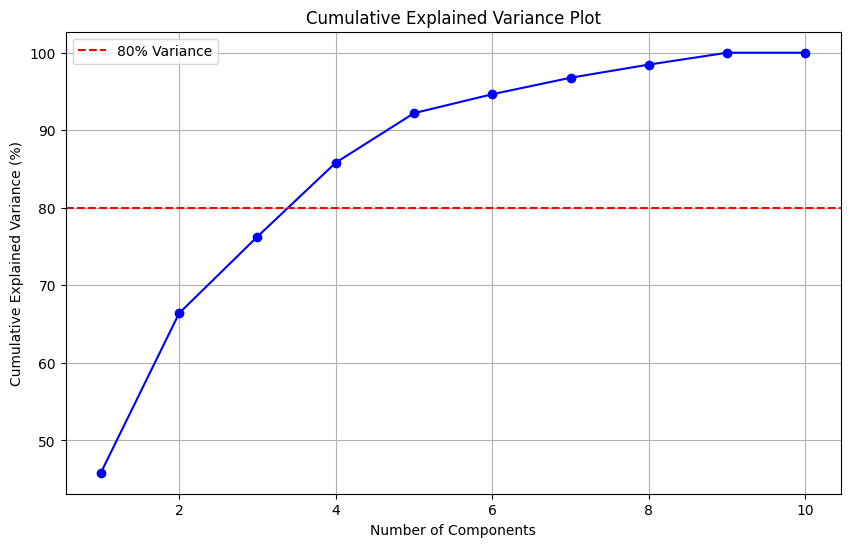

Number of components needed to explain at least 80% variance: 4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_transformed)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_) * 100  # Convert to percentage

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='b')
plt.axhline(y=80, color='r', linestyle='--', label='80% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance Plot')
plt.legend()
plt.grid(True)
plt.show()

# Print the number of components needed to reach 80% variance
num_components = np.argmax(cumulative_explained_variance >= 80) + 1
print(f'Number of components needed to explain at least 80% variance: {num_components}')


Average silhouette score for 4 components: 0.33


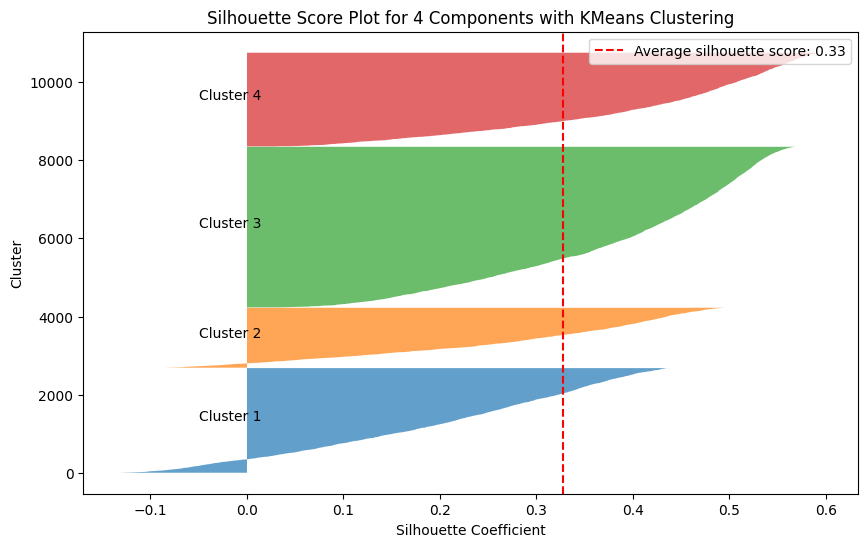

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_transformed)

# Apply PCA to reduce dimensions to 4 components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Calculate the silhouette scores for each sample
silhouette_vals = silhouette_samples(X_pca, cluster_labels)

# Average silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f'Average silhouette score for 4 components: {silhouette_avg:.2f}')

# Plot silhouette scores
plt.figure(figsize=(10, 6))
y_lower = 10  # Initializing the y-axis starting position

for i in range(4):  # Assuming 4 clusters
    # Aggregate silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()

    # Define y_upper to be at the end of the ith cluster's silhouette plot
    y_upper = y_lower + len(ith_cluster_silhouette_vals)

    # Fill the silhouette plot with colors corresponding to each cluster
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0, ith_cluster_silhouette_vals,
        alpha=0.7
    )

    # Label the silhouette plot with cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * len(ith_cluster_silhouette_vals), f'Cluster {i + 1}')

    # Update y_lower for the next plot
    y_lower = y_upper + 10  # 10 for spacing between clusters

# Draw the average silhouette score line
plt.axvline(x=silhouette_avg, color="red", linestyle="--", label=f'Average silhouette score: {silhouette_avg:.2f}')

# Set plot labels and title
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.title('Silhouette Score Plot for 4 Components with KMeans Clustering')
plt.legend()
plt.show()


Silhouette score for 2 clusters: 0.450
Silhouette score for 3 clusters: 0.344
Silhouette score for 4 clusters: 0.328
Silhouette score for 5 clusters: 0.293
Silhouette score for 6 clusters: 0.236
Silhouette score for 7 clusters: 0.232
Silhouette score for 8 clusters: 0.242
Silhouette score for 9 clusters: 0.240
Silhouette score for 10 clusters: 0.233


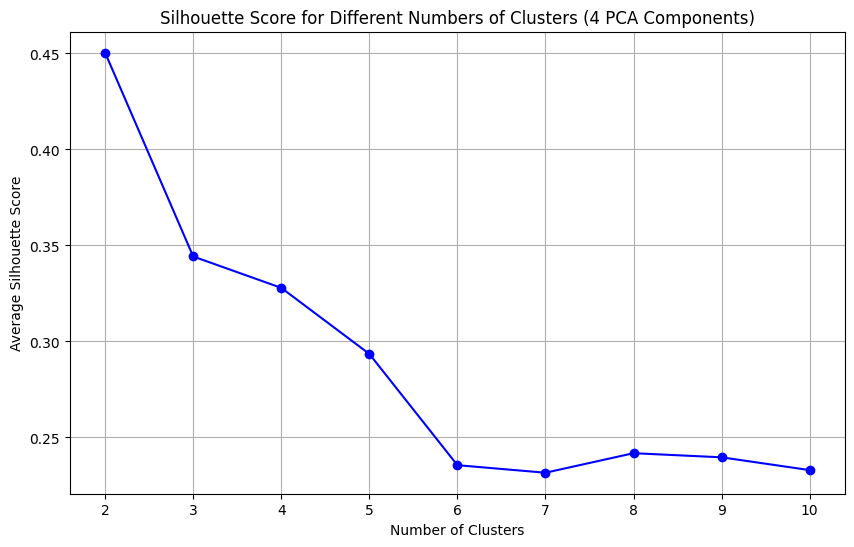

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_transformed)

# Apply PCA to reduce dimensions to 4 components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Range of cluster numbers to evaluate
cluster_range = range(2, 11)  # e.g., from 2 to 10 clusters
silhouette_scores = []

# Compute silhouette scores for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'Silhouette score for {n_clusters} clusters: {silhouette_avg:.3f}')

# Plot silhouette scores vs. number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters (4 PCA Components)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()



Silhouette score for 2 clusters: 0.573
Silhouette score for 3 clusters: 0.493
Silhouette score for 4 clusters: 0.495
Silhouette score for 5 clusters: 0.459
Silhouette score for 6 clusters: 0.400
Silhouette score for 7 clusters: 0.380
Silhouette score for 8 clusters: 0.370
Silhouette score for 9 clusters: 0.349
Silhouette score for 10 clusters: 0.332


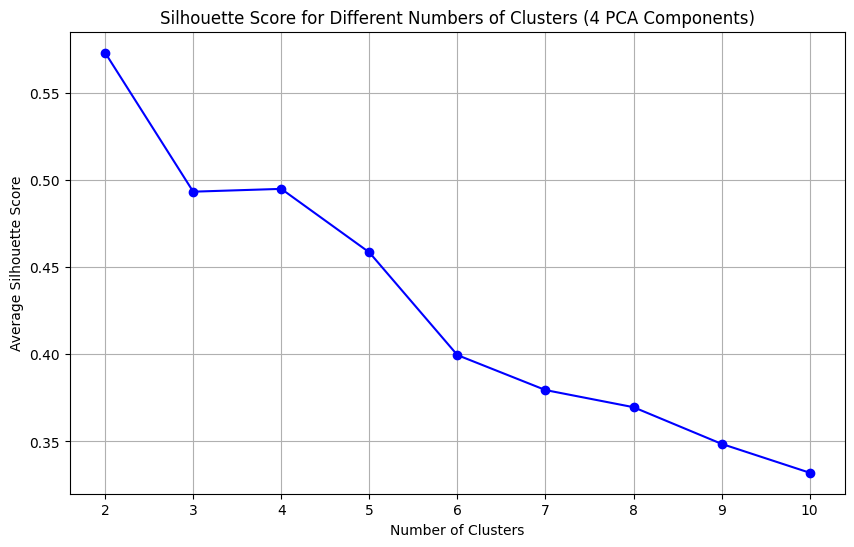

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Standardize the features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_transformed)

# Apply PCA to reduce dimensions to 4 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Range of cluster numbers to evaluate
cluster_range = range(2, 11)  # e.g., from 2 to 10 clusters
silhouette_scores = []

# Compute silhouette scores for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'Silhouette score for {n_clusters} clusters: {silhouette_avg:.3f}')

# Plot silhouette scores vs. number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters (4 PCA Components)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()